In [ ]:
# Cannot run in jupyter labs, use notebook

In [2]:
from posbankthread import PositionBank, DarknessMeasureFlash
posbank = PositionBank(port="random")
posbank.start()
# posbank.sockerrfile.close()

<IPython.core.display.Javascript object>


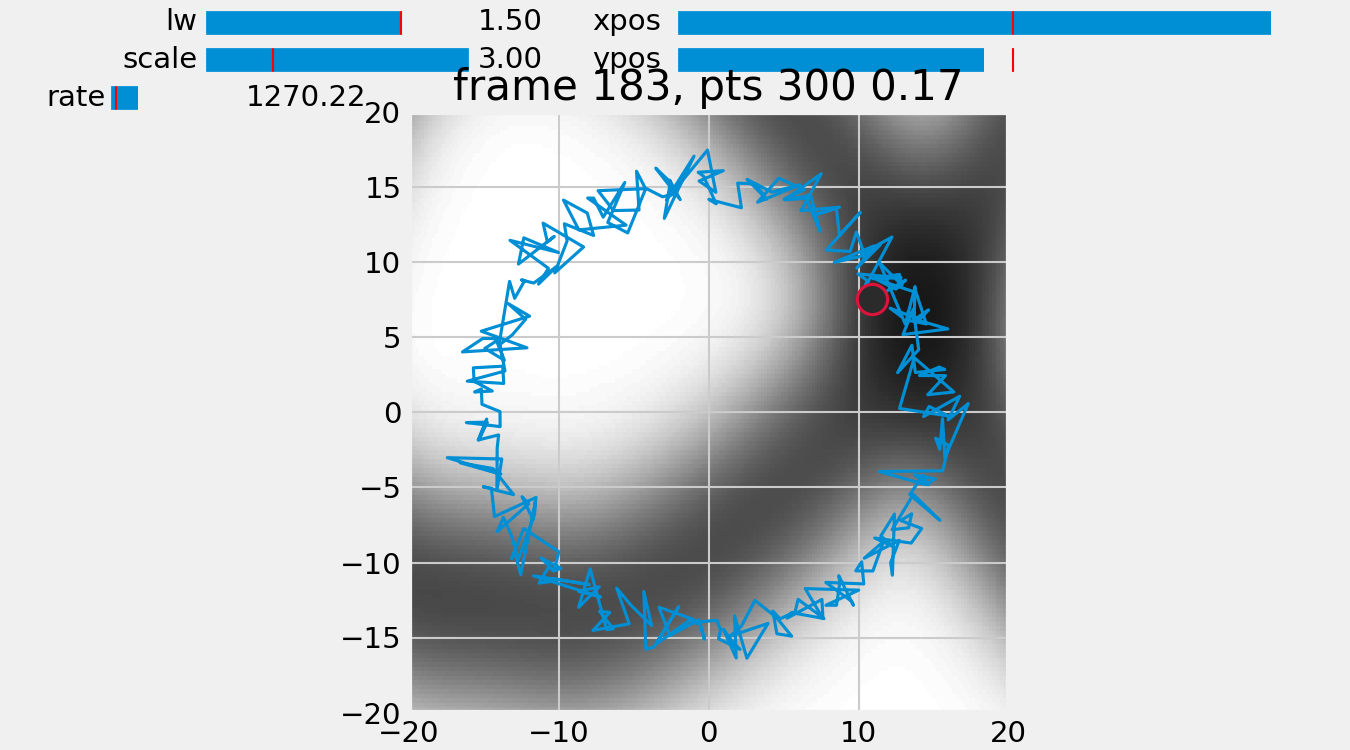

flash connecting


In [3]:
%matplotlib notebook

import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import math

matplotlib.style.use('fivethirtyeight')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(9,5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
playradmetres = 20 
playimg = matplotlib.image.imread('../shape1.png')

# hard code the relative positions of the axes we draw in here
linewidthsliderax = fig.add_axes([0.15, 0.95, 0.20, 0.04], label="controls") # [left,bottom,width,height] as a proportion
bgscalesliderax = fig.add_axes([0.15, 0.90, 0.20, 0.04], label="scale")
bgxpossliderax = fig.add_axes([0.5, 0.95, 0.5, 0.04], label="xposslider")
bgypossliderax = fig.add_axes([0.5, 0.90, 0.5, 0.04], label="yposslider")
updateratesliderax = fig.add_axes([0.08, 0.85, 0.1, 0.04], label="updaterate")

gax = fig.add_axes([0.05, 0.05, 0.95, 0.8], "graphics")
#gax.set_aspect("equal")

trackline, = gax.plot([], [], lw=1)
trackpoint, = gax.plot([], [], marker="o", color="crimson", ms=15)
trackpointC, = gax.plot([], [], marker="o", color="crimson", ms=12)
imgplot = gax.imshow(playimg)
imgplot.set_extent((-playradmetres, playradmetres, -playradmetres, playradmetres))

dmeasf = DarknessMeasureFlash(posbank.queuepoints, imgplot)
dmeasf.start()

gax.set_xlim((-playradmetres, playradmetres))
gax.set_ylim((-playradmetres, playradmetres))


def init():
    trackline.set_data([], [])
    return trackline,

def updateframe(i):
    k = posbank.pdposarray.iloc[:posbank.n]
    trackline.set_data(k.x, k.y)
    trackpoint.set_data(posbank.x, posbank.y)
    trackpointC.set_data(posbank.x, posbank.y)
    
    fp = dmeasf.getunderpixelQ(posbank.x, posbank.y)

    v = max(0, min(255, int(255*fp)))
    col = "#%.2x%.2x%.2x" % (v,v,v)
    trackpointC.set_color(col)
    gax.set_title("frame %d, pts %d %0.2f" % (i, posbank.n, fp))
    return trackline,

def updatefromcontrols(XX):
    trackline.set_linewidth(linewidthslider.val)
    xpos = bgxposslider.val
    ypos = bgyposslider.val
    scale = bgscaleslider.val
    imgplot.set_extent((-playradmetres*scale+xpos, playradmetres*scale+xpos, 
                        -playradmetres*scale+ypos, playradmetres*scale+ypos))
    
def updateframerate(XX):
    anim.event_source.interval = updaterateslider.val
    
linewidthslider = matplotlib.widgets.Slider(linewidthsliderax, 'lw', 0.1, 2, valinit=1.5)
bgscaleslider = matplotlib.widgets.Slider(bgscalesliderax, 'scale', 0.3, 3, valinit=1.0)
bgxposslider = matplotlib.widgets.Slider(bgxpossliderax, 'xpos', -playradmetres, playradmetres, valinit=0)
bgyposslider = matplotlib.widgets.Slider(bgypossliderax, 'ypos', -playradmetres, playradmetres, valinit=0)
updaterateslider = matplotlib.widgets.Slider(updateratesliderax, 'rate', 200, 5000, valinit=500)

linewidthslider.on_changed(updatefromcontrols)
bgscaleslider.on_changed(updatefromcontrols)
bgxposslider.on_changed(updatefromcontrols)
bgyposslider.on_changed(updatefromcontrols)
anim = matplotlib.animation.FuncAnimation(fig, updateframe, init_func=init, interval=200, blit=True)
updaterateslider.on_changed(updateframerate)
updatefromcontrols(0)

plt.show()
#cur_axes.axes.get_xaxis().set_visible(False)


In [4]:
# to suppress this thread
import queue
dmeasf.queuepoints = queue.Queue(1)

In [13]:
dmeasf.sendflash(0.1)